#**Premier Leauge Data Collection and EDA**
ın this notebook, Premier League-specific data is collected from FBref and analyzed using Exploratory Data Analysis techniques. The goal is to clean, understand, and visualize key football performance metrics to prepare for potential predictive modeling.

In [ ]:
import pandas as pd
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
tables = pd.read_html(url)
df2= tables[2]
df8=tables[8]
df10=tables[10]
df18=tables[18]
df2.to_csv('general_stats.csv', index=False)
df8.to_csv('shooting.csv', index=False)
df10.to_csv('passing.csv', index=False)
df18.to_csv('possession.csv', index=False)



### Table Formatting
Unnecessary formatting issues have been cleaned to ensure consistency and readability across all data tables

In [ ]:
import pandas as pd

# File paths (you can adjust these if needed)
files = {
    "general": "general_stats.csv",
    "shooting": "shooting.csv",
    "passing": "passing.csv",
    "possession": "possession.csv"
}

# Function to clean and overwrite each CSV file
def clean_and_overwrite_csv(file_path, drop_columns=["PrgC", "PrgP"]):
    df = pd.read_csv(file_path)
    df.columns = df.iloc[0]       # Promote first row to header
    df = df[1:]                    # Remove the first row from data
    df = df.drop(columns=drop_columns, errors="ignore")  # Drop specified columns
    df.reset_index(drop=True, inplace=True)

    # Overwrite the original file (without index numbers)
    df.to_csv(file_path, index=False)


# Apply the cleaning function to all CSVs
for key, path in files.items():
    clean_and_overwrite_csv(path)



## Cleaning and Selecting the Required Data


In [ ]:
df = pd.read_csv("general_stats.csv")
df.drop(df.columns[6:20], axis=1, inplace=True)


df.to_csv("new_cleaned_general_data.csv", index=False)





In [ ]:
# Divide all columns by the 3rd column (index 2), row-wise
df1 = pd.read_csv("passing.csv")
df1 = df1.iloc[:, [0, 5, 10, 13, 16]]
df1.columns.values[1] = "total_comp%"
df1.columns.values[2] = "short_comp%"
df1.columns.values[3] = "medium_comp%"
df1.columns.values[4] = "long_comp%"

df1.to_csv("new_cleaned_passing.csv", index=False)


In [ ]:
import pandas as pd

# Step 1: Load the CSV file
df = pd.read_csv("shooting.csv")

# Step 2: Define the columns to keep
columns_to_keep = ["Squad", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT"]

# Step 3: Filter the DataFrame
df_cleaned = df[columns_to_keep]

# Step 4: Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv("new_cleaned_shooting.csv", index=False)

print("✅ File saved as new_cleaned_shooting.csv")


✅ File saved as new_cleaned_shooting.csv


## Merging 3 CSV Files
By doing this we generated a one usefull csv file.

In [ ]:

# Read the CSV data
shooting_df = pd.read_csv('new_cleaned_shooting.csv')
passing_df = pd.read_csv('new_cleaned_passing.csv')
general_df = pd.read_csv('new_cleaned_general_data.csv')

# Merge the dataframes on the Squad column
# First merge shooting and passing
merged_df = pd.merge(shooting_df, passing_df, on='Squad', how='outer')

# Then merge with general data
final_df = pd.merge(merged_df, general_df, on='Squad', how='outer')

# Check for duplicate columns and remove them
# This would happen if columns had the same name but different suffixes after merging
duplicate_columns = final_df.columns[final_df.columns.duplicated(keep='first')]
if len(duplicate_columns) > 0:
    print(f"Removing duplicate columns: {duplicate_columns}")
    final_df = final_df.loc[:, ~final_df.columns.duplicated(keep='first')]

# Reset the index to start from 1 instead of 0
final_df.index = final_df.index + 1

# Display the first few rows of the merged dataframe
print("Preview of merged dataframe:")
print(final_df.head())

# Save the merged dataframe to a new CSV file
final_df.to_csv('merged_premier_league_data.csv', index=True, index_label='Rank')
print(f"Merged data saved to 'merged_premier_league_data.csv' with {final_df.shape[0]} rows and {final_df.shape[1]} columns")

# Display full merged dataset to see the results in this web interface
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nFull merged dataset:")
print(final_df)


Preview of merged dataframe:
         Squad  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  total_comp%  short_comp%  medium_comp%  long_comp%  # Pl   Age  Poss  MP  Starts  Gls.1  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  xAG.1  xG+xAG  npxG.1  npxG+xAG.1
1      Arsenal  157  32.6  14.15    4.62  0.12   0.38         84.3         91.7          89.1        51.6    25  26.6  57.1  34     374   1.79   1.47   3.26    1.74    3.21  1.56   1.19    2.75    1.51        2.70
2  Aston Villa  145  33.1  12.88    4.26  0.11   0.34         82.9         90.4          89.0        53.1    28  27.8  51.0  34     374   1.53   1.21   2.74    1.44    2.65  1.54   1.14    2.68    1.40        2.54
3  Bournemouth  176  33.9  15.73    5.33  0.09   0.26         76.2         86.1          84.5        48.1    29  25.9  48.0  33     363   1.55   1.12   2.67    1.36    2.48  1.79   1.22    3.01    1.62        2.84
4    Brentford  148  39.7  11.30    4.48  0.14   0.34         78.1         86.8          84.7        53.1    28  26

In [ ]:
import pandas as pd

# Assuming final_df already exists from the previous code
# If you're running this as a separate script, you'll need to load the merged data first:
# final_df = pd.read_csv('merged_premier_league_data.csv')

# Save the DataFrame to a CSV file
final_df.to_csv('premier_league_complete_data.csv', index=True, index_label='Rank')

print(f"Data successfully saved to 'premier_league_complete_data.csv'")
print(f"File contains {final_df.shape[0]} rows and {final_df.shape[1]} columns")

# To verify the file was created correctly, you can read it back in:
verification = pd.read_csv('premier_league_complete_data.csv')
print("\nVerification - First 5 rows of the saved CSV:")
print(verification.head())

Data successfully saved to 'premier_league_complete_data.csv'
File contains 20 rows and 31 columns

Verification - First 5 rows of the saved CSV:
   Rank        Squad  # Pl_x   90s  Gls   Sh  PK  PKatt    xG  npxG  npxG/Sh  G-xG  np:G-xG  total_comp%  short_comp%  medium_comp%  long_comp%  # Pl_y   Age  Poss  MP  Starts  Gls.1  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  xAG.1  xG+xAG  npxG.1  npxG+xAG.1
0     1      Arsenal      25  34.0   61  481   2      2  53.0  51.5     0.11   8.0      7.5         84.3         91.7          89.1        51.6      25  26.6  57.1  34     374   1.79   1.47   3.26    1.74    3.21  1.56   1.19    2.75    1.51        2.70
1     2  Aston Villa      28  34.0   52  438   3      6  52.4  47.6     0.11  -0.4      1.4         82.9         90.4          89.0        53.1      28  27.8  51.0  34     374   1.53   1.21   2.74    1.44    2.65  1.54   1.14    2.68    1.40        2.54
2     3  Bournemouth      29  33.0   51  519   6      7  59.0  53.5     0.11  -8.0     -8.5 

# EDA: 🔍 Premier League Team Statistics Analysis
In this part of the notebook, we explore and visualize Premier League team data to better understand team performances across key metrics like goals, expected goals (xG), possession, shooting accuracy, and passing.

-Data Overview: We load the dataset, check its structure, and look for missing values or inconsistencies.

-Descriptive Stats: Basic statistical summaries and data types are reviewed to get a clearer picture of the data.

-Metric Comparisons: Bar charts show how teams perform in areas like possession, goals per 90 minutes, xG, and pass completion.

-Correlation & Scatter Plots: Relationships between key stats (e.g. xG vs goals) are visualized to find trends and outliers.

-Finishing Efficiency: We measure how well teams convert chances by comparing goals to xG.

-Quadrant Analysis: Teams are grouped by strengths and weaknesses using side-by-side comparisons of metrics like possession and scoring.

-Attack & Defense Scores: Percentile rankings help us build overall attack and defense ratings.

-Age vs Performance: We explore how average squad age correlates with performance.

-Final Rating: A combined score ranks overall team performance based on multiple metrics.

-Key Insights: We summarize standout teams and interesting trends from the season.

Loaded data for 20 Premier League teams


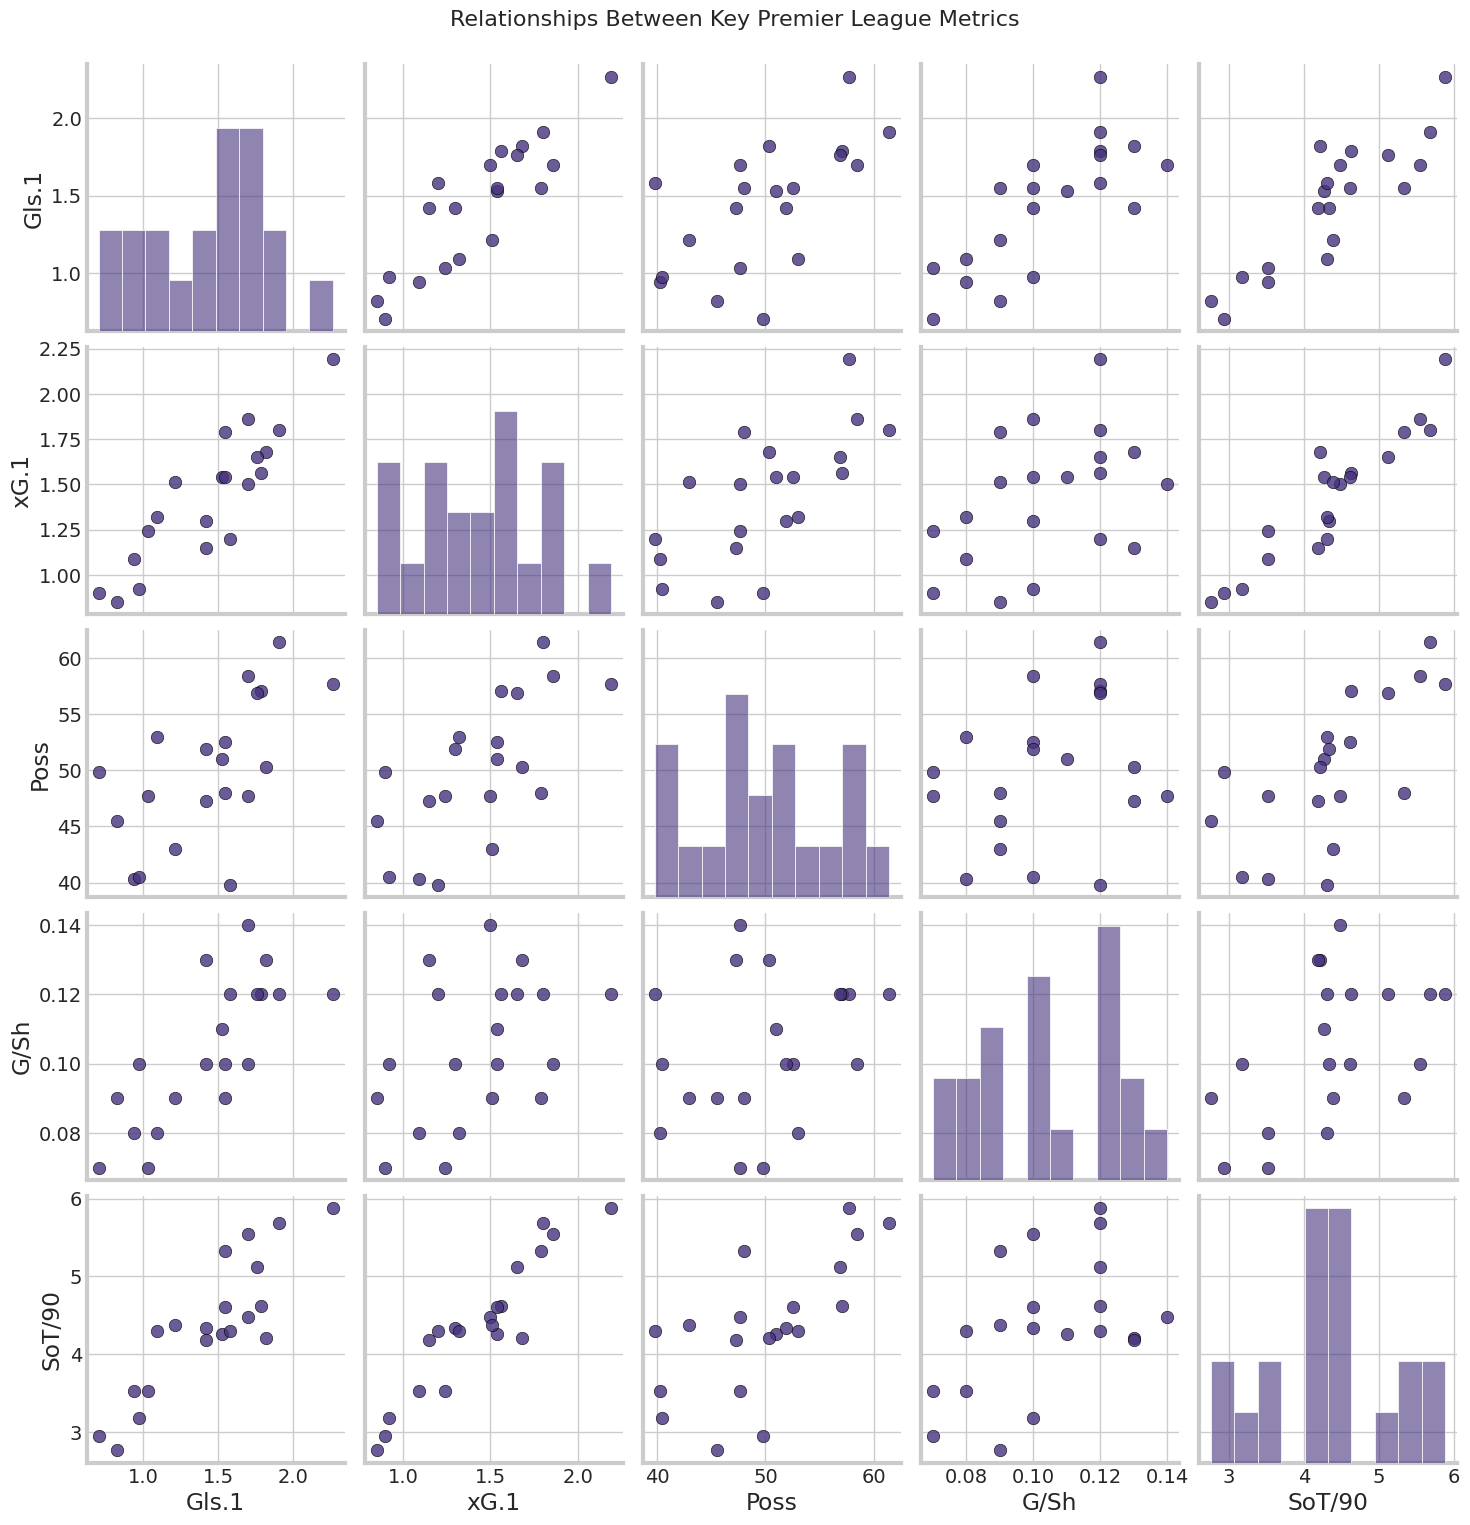

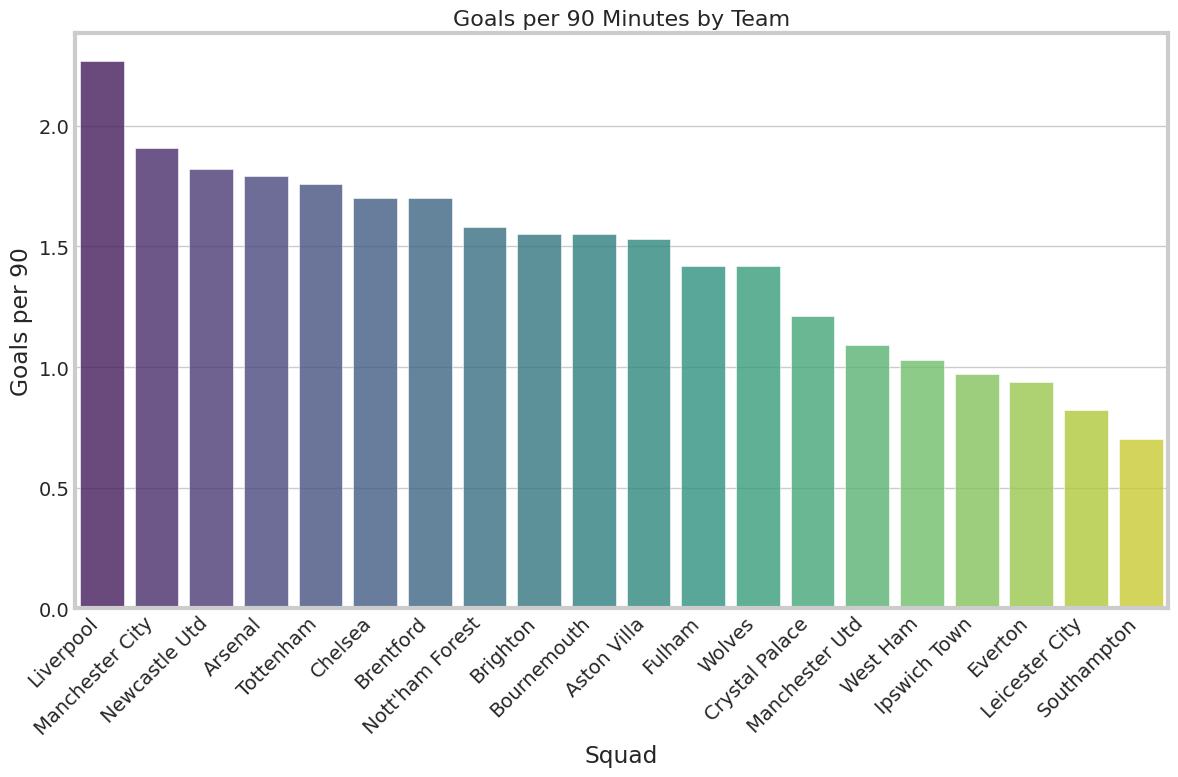

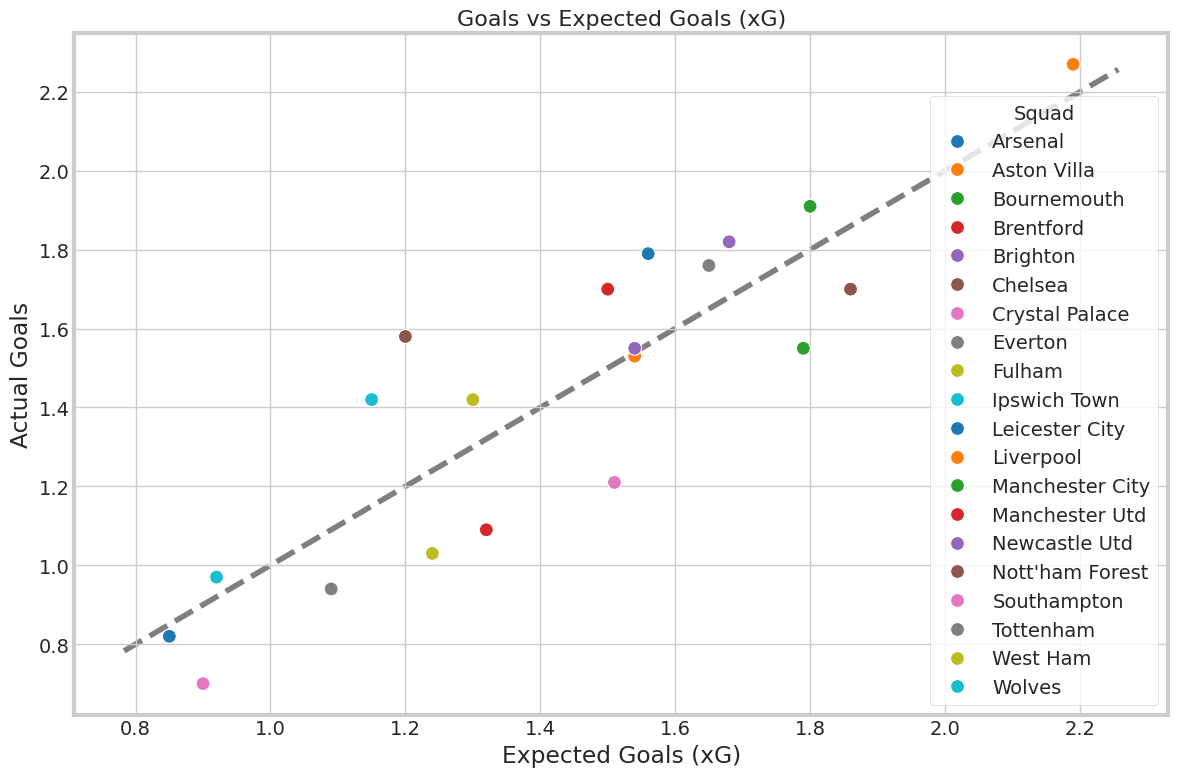

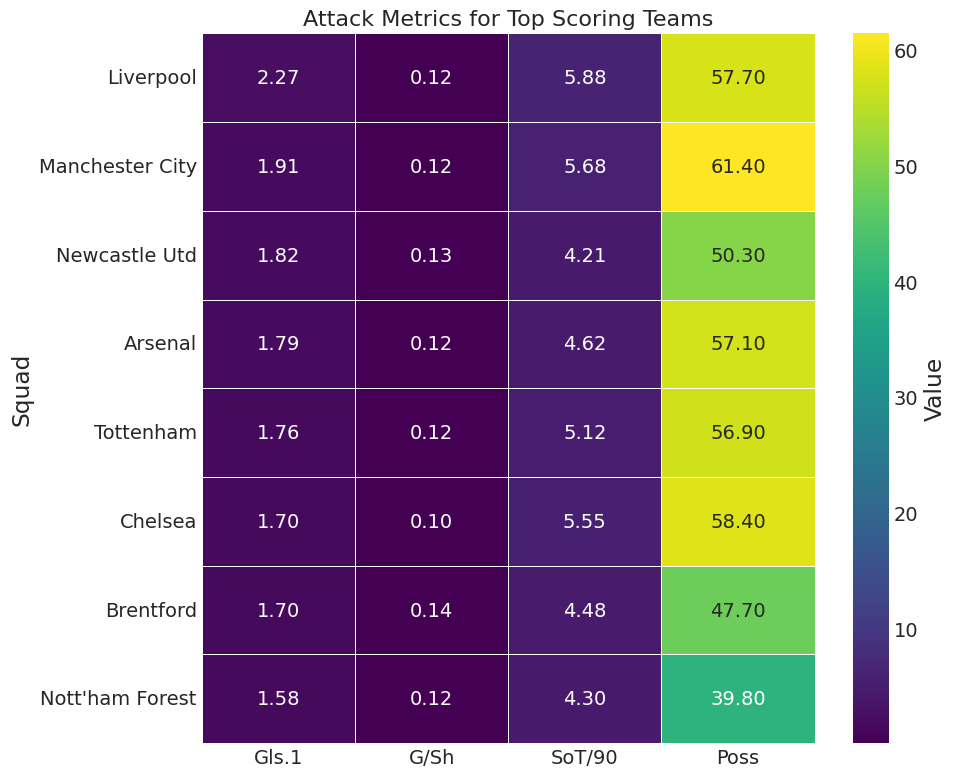

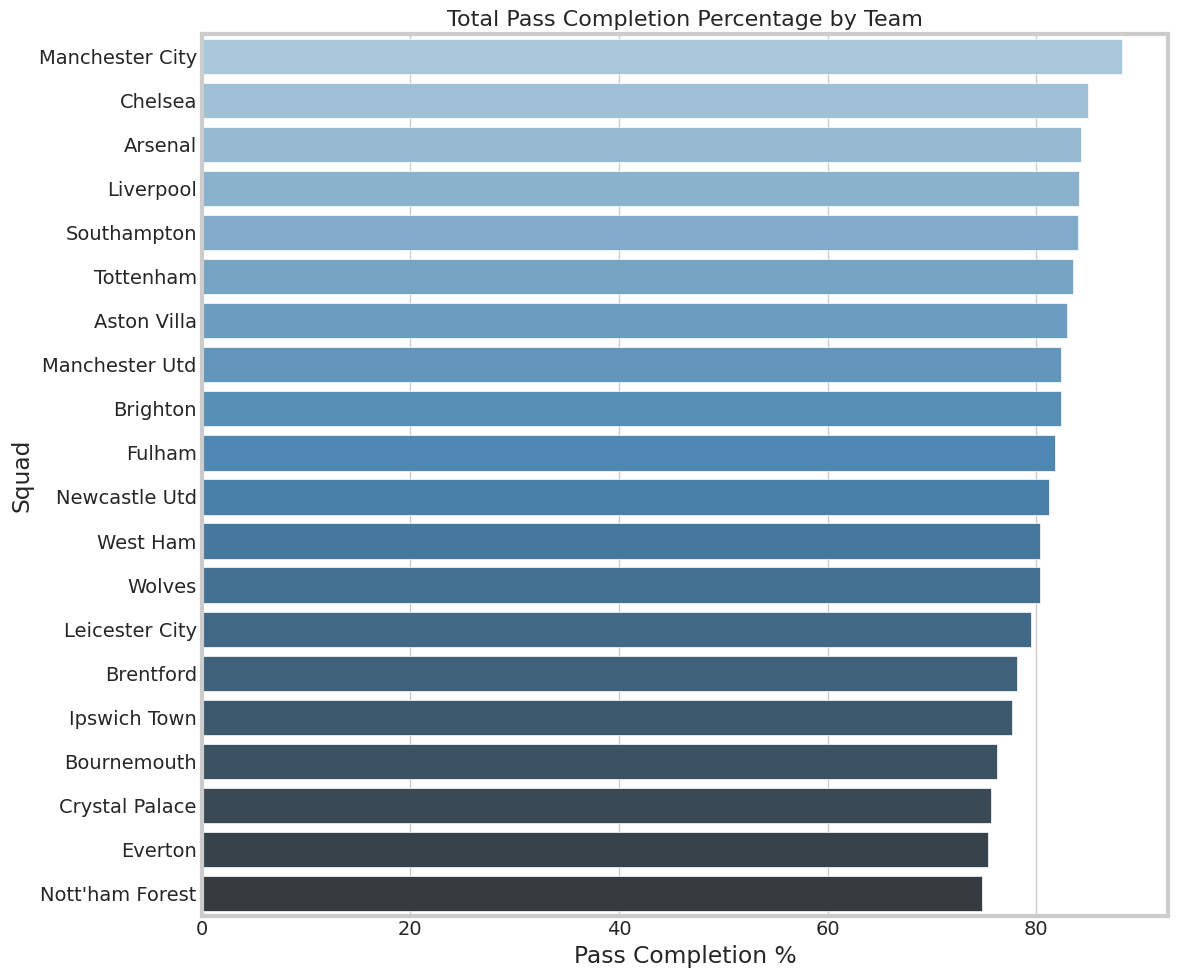

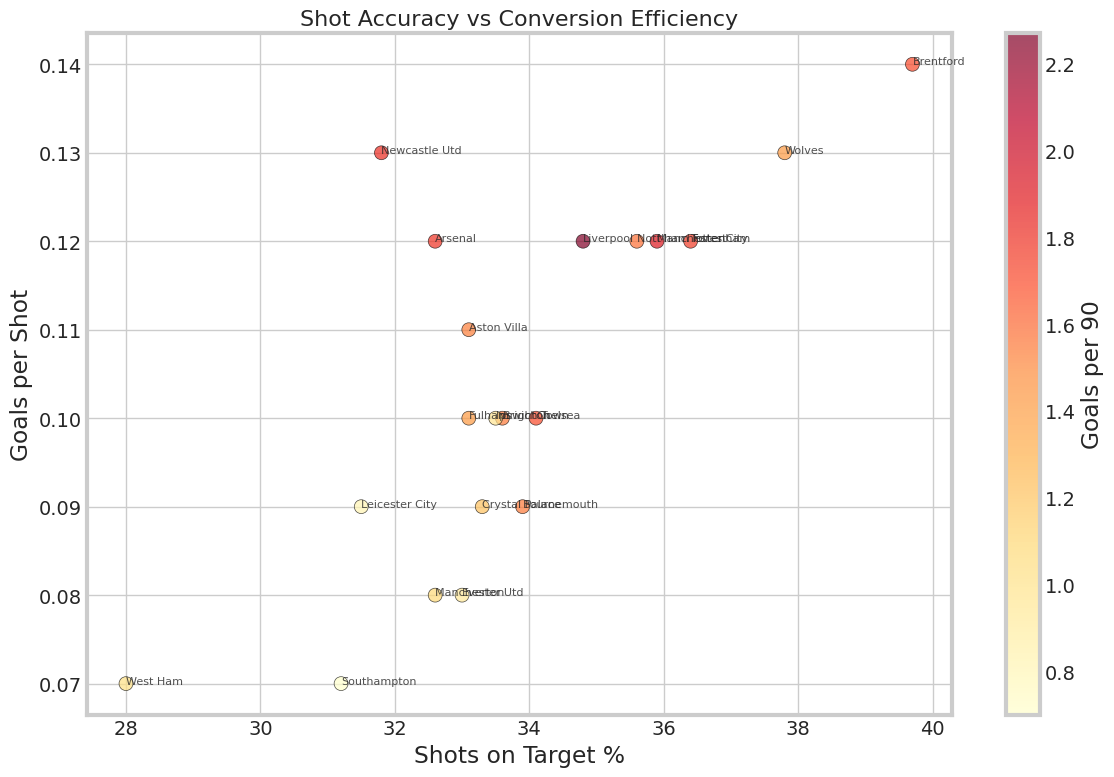

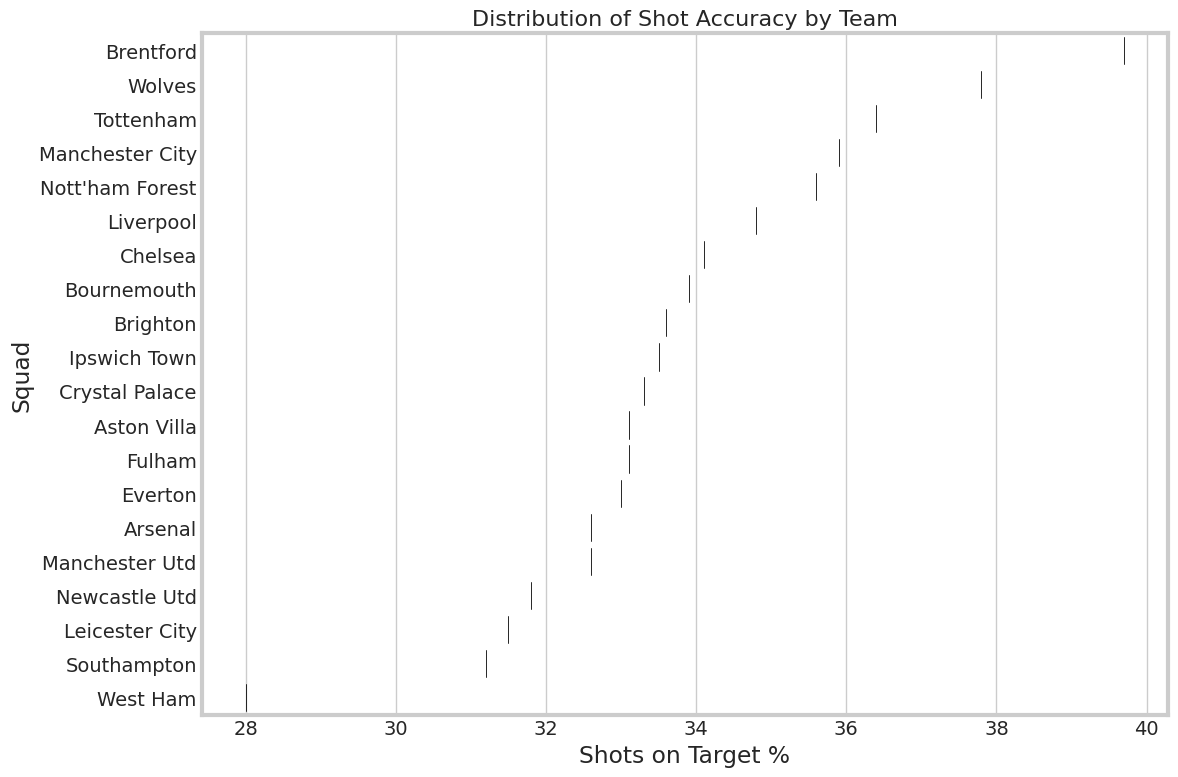

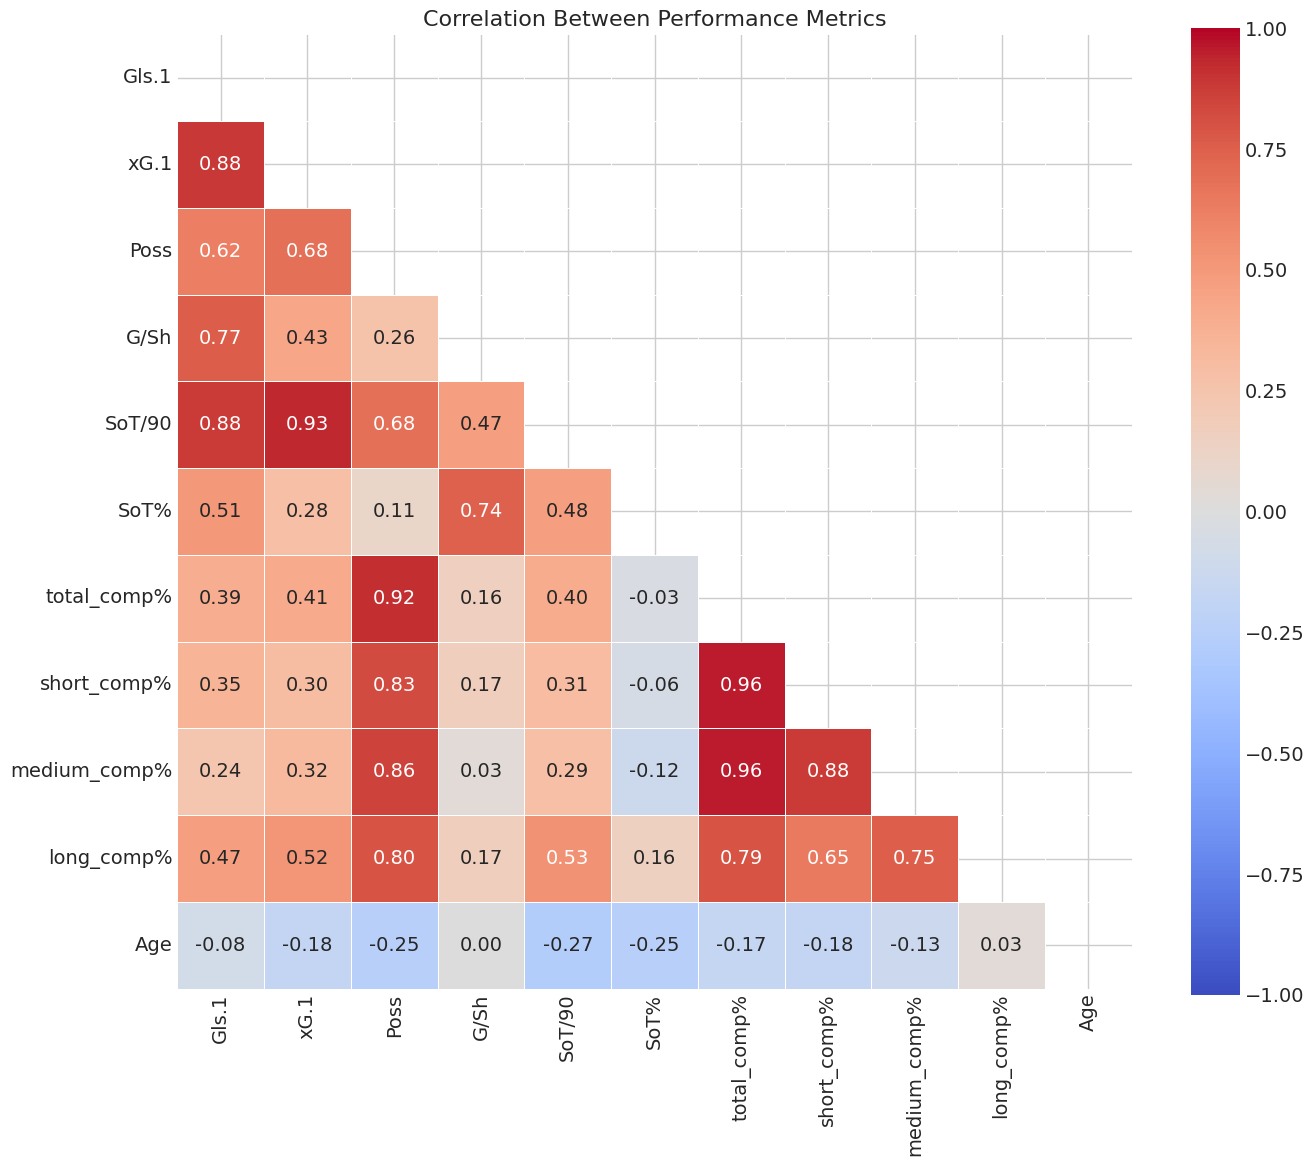

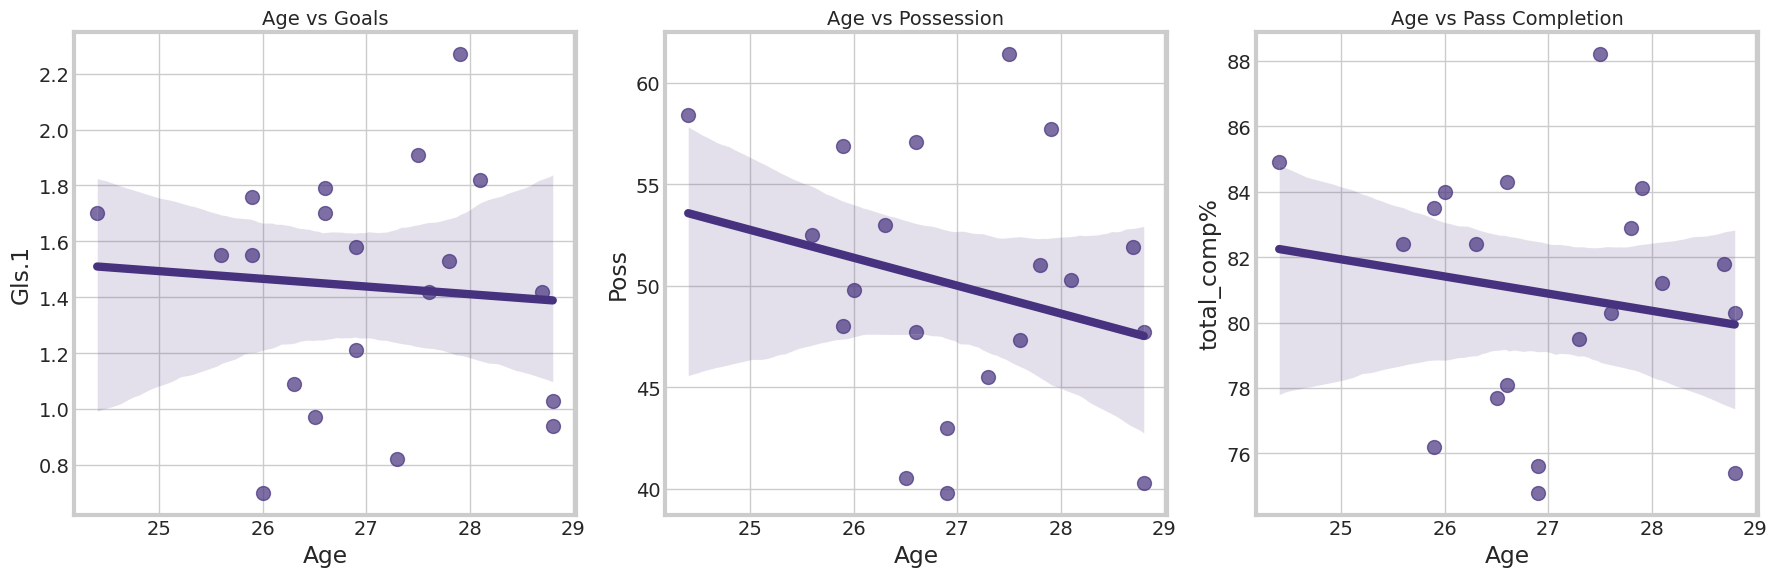

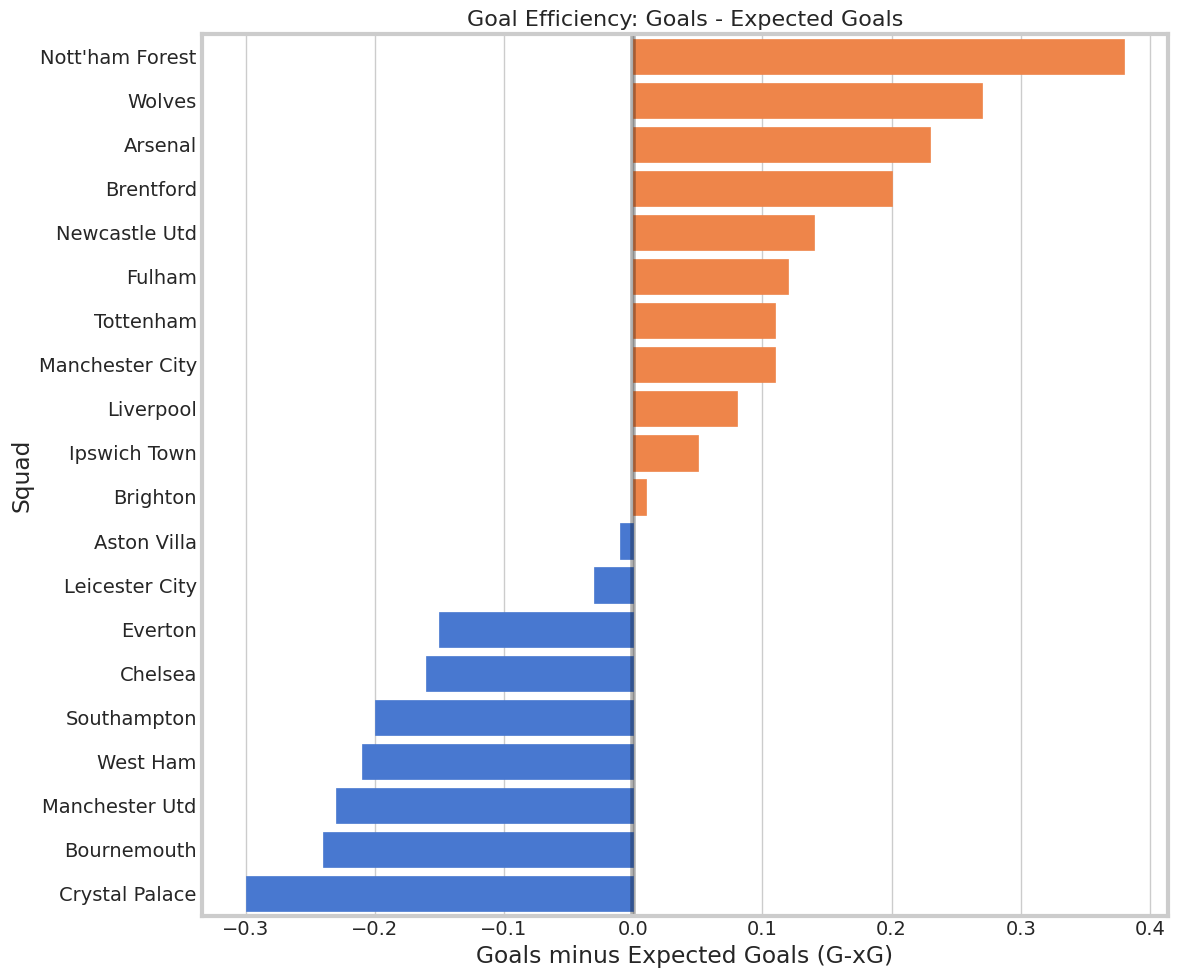

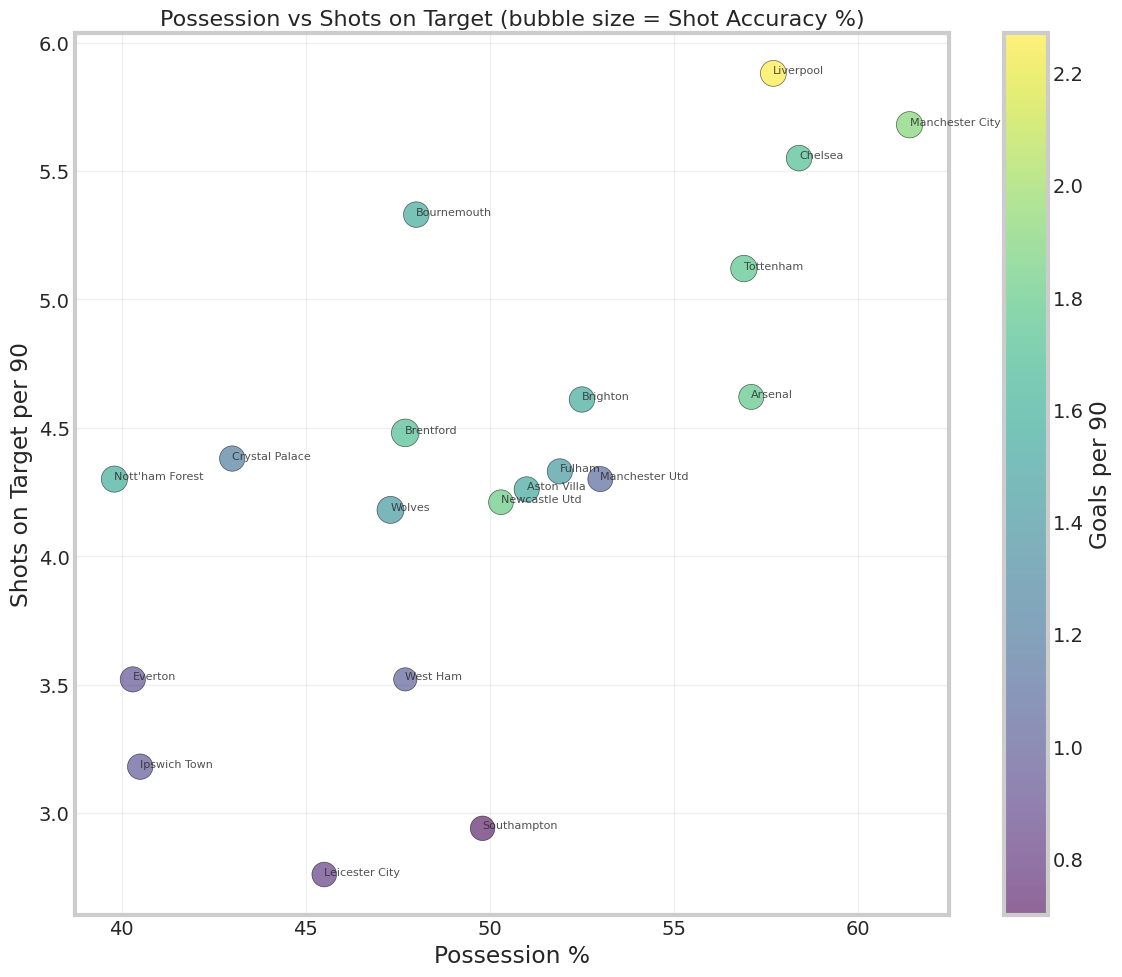

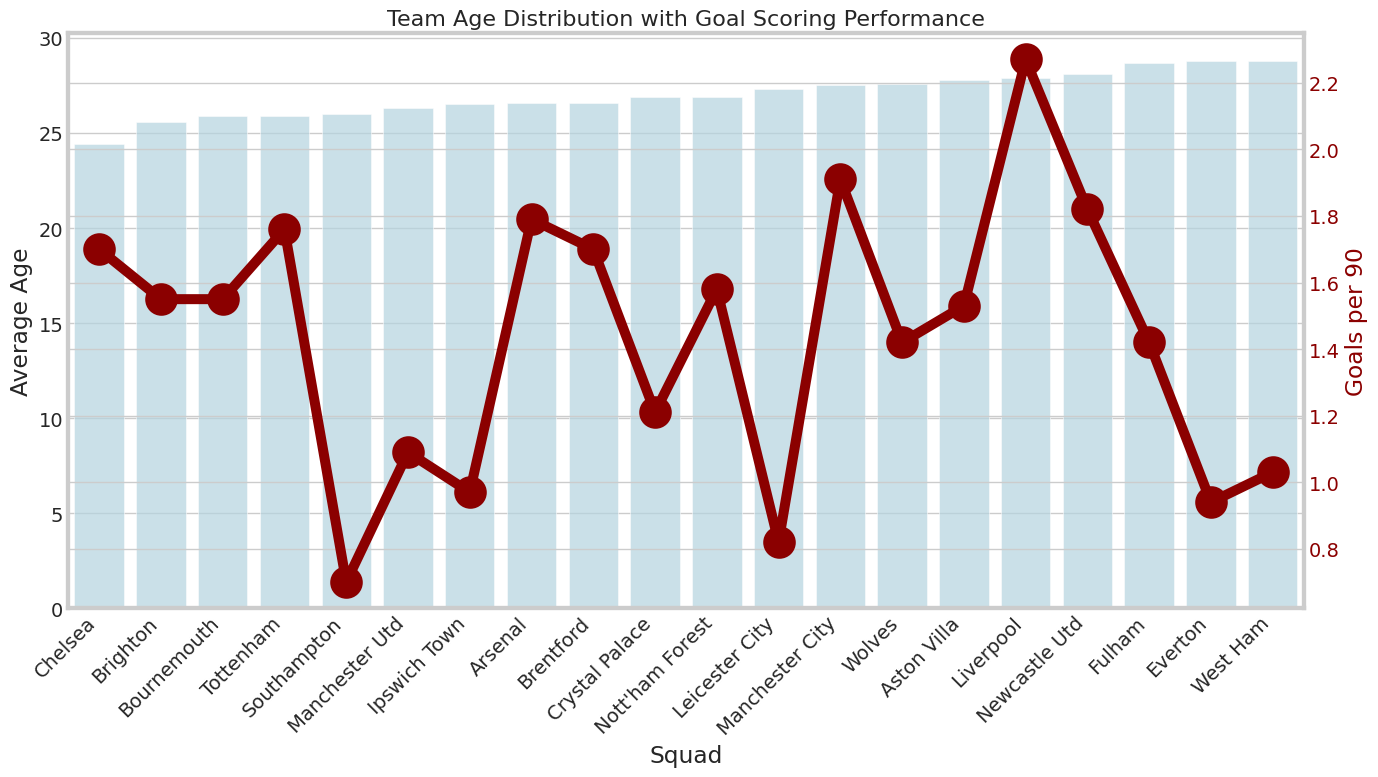

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('merged_premier_league_data.csv')
print(f"Loaded data for {len(df)} Premier League teams")

# Set up the visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# 1. Create a pairplot of key metrics
key_metrics = ['Gls.1', 'xG.1', 'Poss', 'G/Sh', 'SoT/90']
g = sns.pairplot(data=df, vars=key_metrics, height=3,
                 plot_kws={'alpha': 0.8, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'bins': 10, 'alpha': 0.6})
g.fig.suptitle('Relationships Between Key Premier League Metrics', y=1.02, fontsize=16)
plt.show()

# 2. Bar chart of goals per 90 minutes
plt.figure()
top_scoring = df.sort_values('Gls.1', ascending=False)
ax = sns.barplot(x='Squad', y='Gls.1', data=top_scoring,
                palette='viridis', alpha=0.8)
plt.title('Goals per 90 Minutes by Team', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goals per 90')
plt.tight_layout()
plt.show()

# 3. Scatter plot of Expected Goals vs Actual Goals
plt.figure()
sns.scatterplot(x='xG.1', y='Gls.1', data=df, s=100,
                hue='Squad', palette='tab10')
# Add reference line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [max(xmin, ymin), min(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
plt.title('Goals vs Expected Goals (xG)', fontsize=16)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.tight_layout()
plt.show()

# 4. Heatmap of attack metrics for top teams
top_teams = df.sort_values('Gls.1', ascending=False).head(8)
metrics = ['Gls.1', 'G/Sh', 'SoT/90', 'Poss']
plt.figure(figsize=(10, 8))
attack_data = top_teams[['Squad'] + metrics].set_index('Squad')
sns.heatmap(attack_data, annot=True, cmap='viridis', fmt='.2f',
            linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title('Attack Metrics for Top Scoring Teams', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Passing accuracy comparison (horizontal bar chart)
plt.figure(figsize=(12, 10))
passing_data = df.sort_values('total_comp%', ascending=False)
sns.barplot(y='Squad', x='total_comp%', data=passing_data,
            palette='Blues_d', orient='h')
plt.title('Total Pass Completion Percentage by Team', fontsize=16)
plt.xlabel('Pass Completion %')
plt.tight_layout()
plt.show()

# 6. Shot on target percentage vs Goals per shot
plt.figure()
plt.scatter(df['SoT%'], df['G/Sh'], s=100, alpha=0.7,
            c=df['Gls.1'], cmap='YlOrRd', edgecolors='k')
plt.colorbar(label='Goals per 90')
for i, txt in enumerate(df['Squad']):
    plt.annotate(txt, (df['SoT%'].iloc[i], df['G/Sh'].iloc[i]),
                fontsize=8, alpha=0.8)
plt.title('Shot Accuracy vs Conversion Efficiency', fontsize=16)
plt.xlabel('Shots on Target %')
plt.ylabel('Goals per Shot')
plt.tight_layout()
plt.show()

# 7. Distribution of Shot Accuracy (Violin Plot)
plt.figure(figsize=(12, 8))
sns.violinplot(x='SoT%', y='Squad', data=df.sort_values('SoT%', ascending=False),
              palette='mako', inner='quart')
plt.title('Distribution of Shot Accuracy by Team', fontsize=16)
plt.xlabel('Shots on Target %')
plt.tight_layout()
plt.show()

# 8. Correlation heatmap of key metrics
plt.figure(figsize=(14, 12))
corr_metrics = ['Gls.1', 'xG.1', 'Poss', 'G/Sh', 'SoT/90', 'SoT%', 'total_comp%',
                'short_comp%', 'medium_comp%', 'long_comp%', 'Age']
corr_matrix = df[corr_metrics].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5)
plt.title('Correlation Between Performance Metrics', fontsize=16)
plt.tight_layout()
plt.show()

# 9. Age vs Performance metrics (3 subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Age vs Goals
sns.regplot(x='Age', y='Gls.1', data=df, ax=axes[0], scatter_kws={'s':100, 'alpha':0.7})
axes[0].set_title('Age vs Goals', fontsize=14)
# Age vs Possession
sns.regplot(x='Age', y='Poss', data=df, ax=axes[1], scatter_kws={'s':100, 'alpha':0.7})
axes[1].set_title('Age vs Possession', fontsize=14)
# Age vs Pass Completion
sns.regplot(x='Age', y='total_comp%', data=df, ax=axes[2], scatter_kws={'s':100, 'alpha':0.7})
axes[2].set_title('Age vs Pass Completion', fontsize=14)
plt.tight_layout()
plt.show()

# 10. Shot efficiency - difference between actual goals and expected goals (G-xG)
plt.figure(figsize=(12, 10))
df['G_minus_xG'] = df['Gls.1'] - df['xG.1']
goal_diff = df.sort_values('G_minus_xG', ascending=False)
bars = sns.barplot(y='Squad', x='G_minus_xG', data=goal_diff,
           palette='RdBu_r', orient='h')
# Color positive/negative bars differently
for i, bar in enumerate(bars.patches):
    if bar.get_width() < 0:
        bar.set_color('#4878d0')  # Blue for negative
    else:
        bar.set_color('#ee854a')  # Orange for positive
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Goal Efficiency: Goals - Expected Goals', fontsize=16)
plt.xlabel('Goals minus Expected Goals (G-xG)')
plt.tight_layout()
plt.show()

# 11. Possession vs Shots on Target relationship with Shot Accuracy (bubble size)
plt.figure(figsize=(12, 10))
plt.scatter(df['Poss'], df['SoT/90'], s=df['SoT%']*10,
            alpha=0.6, c=df['Gls.1'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Goals per 90')
for i, txt in enumerate(df['Squad']):
    plt.annotate(txt, (df['Poss'].iloc[i], df['SoT/90'].iloc[i]),
                fontsize=8, alpha=0.8)
plt.title('Possession vs Shots on Target (bubble size = Shot Accuracy %)', fontsize=16)
plt.xlabel('Possession %')
plt.ylabel('Shots on Target per 90')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 12. Team average age distribution with performance indicators
plt.figure(figsize=(14, 8))
# Sort by age
age_sorted_df = df.sort_values('Age')
# Primary axis - team age
ax1 = sns.barplot(x='Squad', y='Age', data=age_sorted_df, color='lightblue', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Age')

# Secondary axis - goals
ax2 = ax1.twinx()
sns.pointplot(x='Squad', y='Gls.1', data=age_sorted_df, color='darkred', ax=ax2)
ax2.set_ylabel('Goals per 90', color='darkred')
ax2.tick_params(axis='y', colors='darkred')

plt.title('Team Age Distribution with Goal Scoring Performance', fontsize=16)
plt.tight_layout()
plt.show()